# Importing initial Library


In [1]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from tqdm import tqdm

# Data loading and intial cleaning , Ensuring imputation

In [2]:
seed = 7
num_trees= 100
max_features = 3
rng = RandomState(seed)
df = pd.read_csv('preprocessed.csv')
df1=df
X1, y1 = df.iloc[:, :-1], df.iloc[:, -1]
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df = imputer.fit_transform(df)
df=pd.DataFrame(df)
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(12599, 64) (12599,)


In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA Analysis

In [4]:
intervention=df.iloc[:,-1]
data_min = X.min(axis=0)
data_max = X.max(axis=0)
data_norm = (X-data_min)/(data_max-data_min)

In [5]:
pca = PCA(n_components=30)
pca.fit(data_norm)

PCA(n_components=30)

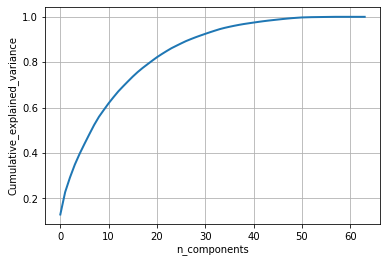

In [6]:
pca.n_components = 64
pca_data = pca.fit_transform(data_norm)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
cum_var_explained
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis()
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [7]:
pca = PCA(n_components=30)
pca.fit(data_norm)

PCA(n_components=30)

In [8]:
print(pca.components_)

[[ 0.01876466 -0.08501396  0.26511241 ...  0.03622391 -0.00086308
   0.01391175]
 [-0.1701061   0.49789491  0.04354452 ... -0.15146045  0.00192325
   0.00082733]
 [-0.02908743 -0.02781685  0.18427736 ...  0.0156731  -0.00084874
   0.01431436]
 ...
 [ 0.04111367  0.11904486 -0.1069506  ... -0.15706396  0.03375185
  -0.05010993]
 [ 0.01240848  0.05558346  0.07752292 ...  0.12143256 -0.02504451
   0.08214282]
 [ 0.07729416  0.03869562  0.13471555 ... -0.16212915 -0.01041844
  -0.0139862 ]]


[0.73002827 0.56028422 0.36600662 0.32031512 0.27212987 0.24662575
 0.23945595 0.23320222 0.20489051 0.17048929 0.16612662 0.15162918
 0.14550296 0.12693064 0.12314747 0.12055883 0.11106474 0.10035353
 0.09213338 0.09120202 0.08831376 0.07877317 0.07501265 0.0711245
 0.06057705 0.05951643 0.05748773 0.04925142 0.04707777 0.04337916]
[0.12876223 0.09882281 0.06455617 0.05649711 0.04799821 0.0434998
 0.04223519 0.04113216 0.03613854 0.03007086 0.02930138 0.02674432
 0.02566378 0.022388   0.02172072 0.02126414 0.01958958 0.01770033
 0.01625047 0.01608619 0.01557676 0.01389399 0.01323072 0.01254492
 0.01068457 0.01049749 0.01013967 0.00868695 0.00830357 0.00765121]


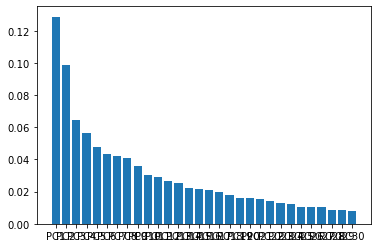

In [9]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
plt.bar(x=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14","PC15","PC16","PC17","PC18","PC19","P20","PC21","PC22","PC23","PC24","PC25","PC26","PC27","PC28","PC29","PC30"],height=pca.explained_variance_ratio_)
plt.show()

In [10]:
weights = pca.components_
weights = weights.transpose()
T = data_norm.dot(weights[:,:2])

In [11]:
print(T)

              0         1
0     -0.242927  0.446983
1     -1.168836  0.186192
2     -1.071407  0.273312
3     -1.181540  0.203215
4     -1.097643  0.208705
...         ...       ...
12594  0.588463 -0.362630
12595  1.053547 -0.392191
12596  1.247103 -0.407229
12597  1.074569 -0.323162
12598  1.121635 -0.375063

[12599 rows x 2 columns]


In [12]:
print(pca.explained_variance_)

[0.73002827 0.56028422 0.36600662 0.32031512 0.27212987 0.24662575
 0.23945595 0.23320222 0.20489051 0.17048929 0.16612662 0.15162918
 0.14550296 0.12693064 0.12314747 0.12055883 0.11106474 0.10035353
 0.09213338 0.09120202 0.08831376 0.07877317 0.07501265 0.0711245
 0.06057705 0.05951643 0.05748773 0.04925142 0.04707777 0.04337916]


In [13]:
print(pca.explained_variance_ratio_)

[0.12876223 0.09882281 0.06455617 0.05649711 0.04799821 0.0434998
 0.04223519 0.04113216 0.03613854 0.03007086 0.02930138 0.02674432
 0.02566378 0.022388   0.02172072 0.02126414 0.01958958 0.01770033
 0.01625047 0.01608619 0.01557676 0.01389399 0.01323072 0.01254492
 0.01068457 0.01049749 0.01013967 0.00868695 0.00830357 0.00765121]


In [14]:
X=pca.transform(data_norm)

# Splitting The data

In [15]:

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=seed)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (10079, 30) (10079,)
Test set:  (2520, 30) (2520,)


# Importing All model Building Library

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Defining the Model

In [17]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                            random_state=rng)
rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=rng)
sv = SVC(kernel='rbf', C=15.0)

LR=LogisticRegression(multi_class='multinomial', solver='newton-cg')

gnb = GaussianNB()

kfold = KFold(n_splits=10)
KNN = KNeighborsClassifier()

BC=BaggingClassifier(base_estimator=dt, n_estimators=num_trees, random_state=seed)

EC=ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)

ADC=AdaBoostClassifier(n_estimators=num_trees, random_state=seed) 

GBC=GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)



BCR=BaggingClassifier(base_estimator=rf, n_estimators=num_trees, random_state=seed)

mnb=MultinomialNB()

# Fitting the Model

In [18]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       random_state=RandomState(MT19937) at 0x1584D0EEB40)

In [19]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy',
                       random_state=RandomState(MT19937) at 0x1584D0EEB40)

In [20]:
sv.fit(X_train, y_train)

SVC(C=15.0)

In [21]:
gnb.fit(X_train, y_train)

GaussianNB()

In [22]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
BC.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        random_state=RandomState(MT19937) at 0x1584D0EEB40),
                  n_estimators=100, random_state=7)

In [24]:
EC.fit(X_train, y_train)

ExtraTreesClassifier(max_features=3)

In [25]:
ADC.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=7)

In [26]:
GBC.fit(X_train, y_train)

GradientBoostingClassifier(random_state=7)

In [27]:
LR.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [28]:
BCR.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        random_state=RandomState(MT19937) at 0x1584D0EEB40),
                  n_estimators=100, random_state=7)

In [29]:
#dt.fit(X_train, y_train)
#rf.fit(X_train, y_train)
#sv.fit(X_train, y_train)
#gnb.fit(X_train, y_train)
#KNN.fit(X_train, y_train)
#BC.fit(X_train, y_train)
#EC.fit(X_train, y_train)
#ADC.fit(X_train, y_train)
#GBC.fit(X_train, y_train)
#LR.fit(X_train, y_train)
#BCR.fit(X_train, y_train)
#mnb.fit(X_train, y_train)

# Predicting the Value

In [30]:
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
sv_pred = sv.predict(X_test)
gnb_pred = gnb.predict(X_test)
KNN_pred = KNN.predict(X_test)
BC_pred = BC.predict(X_test)
EC_pred = EC.predict(X_test)
ADC_pred = ADC.predict(X_test)
GBC_pred = GBC.predict(X_test)
LR_pred = LR.predict(X_test)
BCR_pred = BCR.predict(X_test)


# Getting Accuracy and AUC

In [31]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix

dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
sv_acc = accuracy_score(y_test, sv_pred)
gnb_acc = accuracy_score(y_test, gnb_pred)
KNN_acc = accuracy_score(y_test, KNN_pred)
BC_acc = accuracy_score(y_test, BC_pred)
EC_acc = accuracy_score(y_test, EC_pred)
ADC_acc = accuracy_score(y_test, ADC_pred)
GBC_acc = accuracy_score(y_test, GBC_pred)
LR_acc = accuracy_score(y_test, LR_pred)
BCR_acc = accuracy_score(y_test, BCR_pred)


In [32]:
dt_auc = roc_auc_score(y_test, dt_pred)
rf_auc = roc_auc_score(y_test, rf_pred)
sv_auc = roc_auc_score(y_test, sv_pred)
gnb_auc = roc_auc_score(y_test, gnb_pred)
KNN_auc = roc_auc_score(y_test, KNN_pred)
BC_auc = roc_auc_score(y_test, BC_pred)
EC_auc = roc_auc_score(y_test, EC_pred)
ADC_auc = roc_auc_score(y_test, ADC_pred)
GBC_auc = roc_auc_score(y_test, GBC_pred)
LR_auc = roc_auc_score(y_test, LR_pred)
BCR_auc = roc_auc_score(y_test, BCR_pred)


In [33]:
print('Decision tree acc: %.6f' % dt_acc)
print('Random forest acc: %.6f' % rf_acc)
print('SVM acc: %.6f' % sv_acc)
print('Nabive Baise acc: %.6f' % gnb_acc)
print('KNN: %.6f' % KNN_acc)
print('BAGGING: %.6f' % BC_acc)
print('Extra tree: %.6f' % EC_acc)
print('ADC Boosting: %.6f' % ADC_acc)
print('GDC Boosting: %.6f' % GBC_acc)
print('Logistic: %.6f' % LR_acc)
print('BAGGING Random Forest: %.6f' % BCR_acc)

print()
print('Decision tree AUC: %.6f' % dt_auc)
print('Random forest AUC: %.6f' % rf_auc)
print('SVM AUC: %.6f' % sv_auc)
print('gnb AUC: %.6f' % gnb_auc)
print('KNN AUC: %.6f' % KNN_auc)
print('Bagging AUC: %.6f' % BC_auc)
print('Extra tree AUC: %.6f' % EC_auc)
print('ADC Boosting: %.6f' % ADC_auc)
print('GDC Boosting: %.6f' % GBC_auc)
print('Logistic: %.6f' % LR_auc)
print('BAGGING Random Forest: %.6f' % BCR_auc)


Decision tree acc: 0.660714
Random forest acc: 0.721825
SVM acc: 0.729762
Nabive Baise acc: 0.661111
KNN: 0.673016
BAGGING: 0.686905
Extra tree: 0.715476
ADC Boosting: 0.671825
GDC Boosting: 0.703175
Logistic: 0.669048
BAGGING Random Forest: 0.728571

Decision tree AUC: 0.642239
Random forest AUC: 0.709982
SVM AUC: 0.720638
gnb AUC: 0.652661
KNN AUC: 0.660358
Bagging AUC: 0.663538
Extra tree AUC: 0.701236
ADC Boosting: 0.657683
GDC Boosting: 0.685465
Logistic: 0.652959
BAGGING Random Forest: 0.714372


# Plotting Confusion Matrix

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:111: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


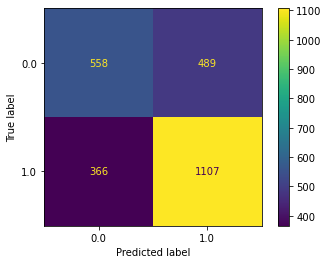

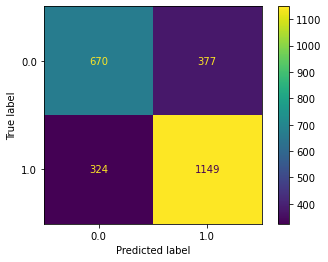

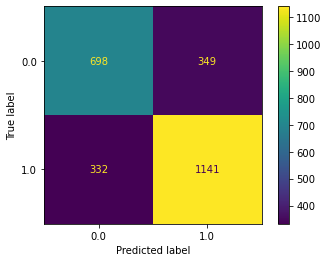

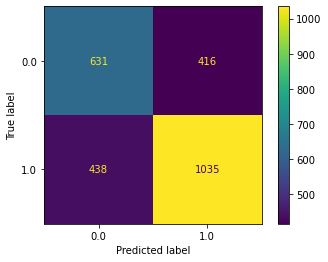

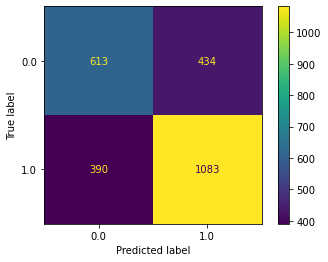

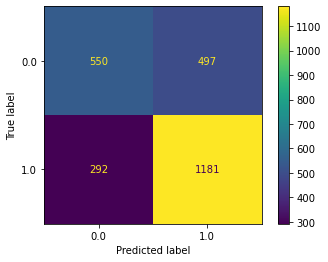

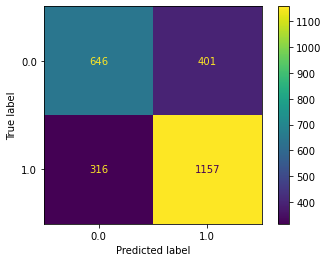

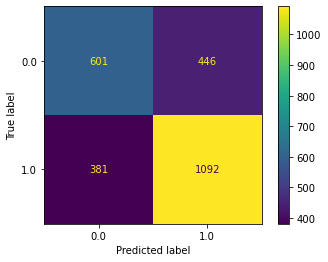

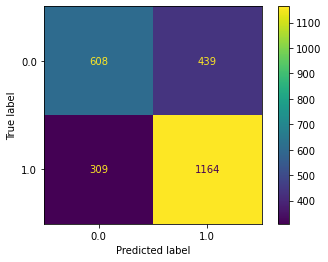

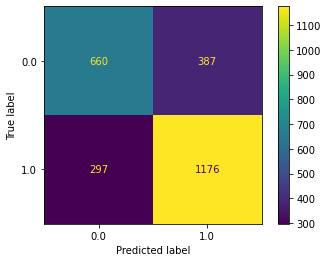

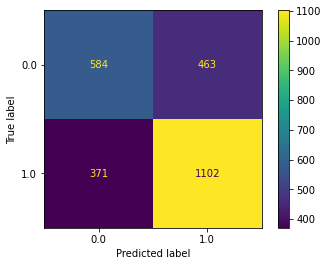

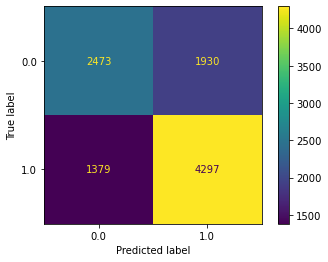

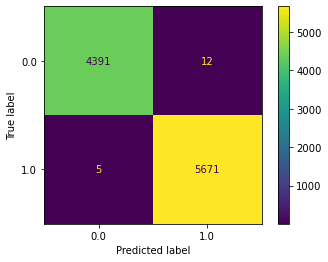

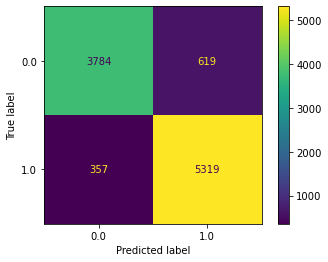

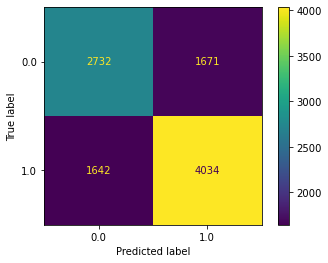

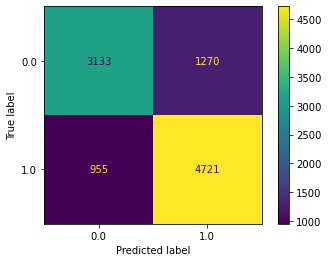

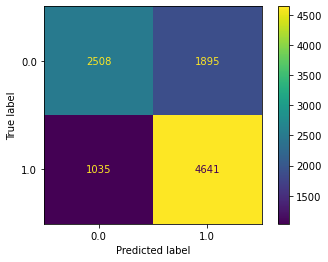

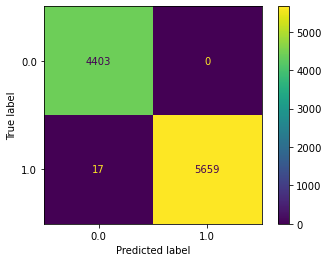

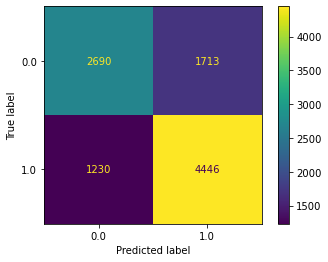

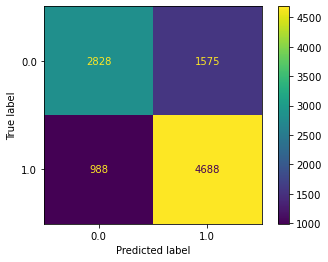

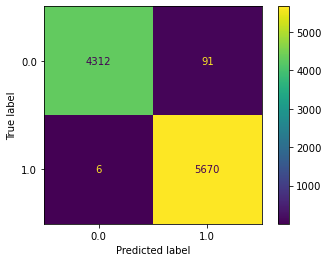

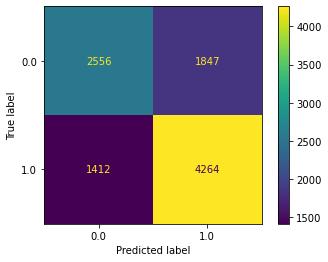

In [34]:

p1=plot_confusion_matrix(dt, X_test, y_test)
p2=plot_confusion_matrix(rf, X_test, y_test)
p3=plot_confusion_matrix(sv, X_test, y_test)
p4=plot_confusion_matrix(gnb, X_test, y_test)
p5=plot_confusion_matrix(KNN, X_test, y_test)
p6=plot_confusion_matrix(BC, X_test, y_test)
p7=plot_confusion_matrix(EC, X_test, y_test)
p8=plot_confusion_matrix(ADC, X_test, y_test)
p9=plot_confusion_matrix(GBC, X_test, y_test)
p10=plot_confusion_matrix(BCR, X_test, y_test)
p11=plot_confusion_matrix(LR, X_test, y_test)


p13=plot_confusion_matrix(dt, X_train, y_train)
p14=plot_confusion_matrix(rf, X_train, y_train)
p15=plot_confusion_matrix(sv, X_train, y_train)
p16=plot_confusion_matrix(gnb, X_train, y_train)
p17=plot_confusion_matrix(KNN, X_train, y_train)
p18=plot_confusion_matrix(BC, X_train, y_train)
p19=plot_confusion_matrix(EC, X_train, y_train)
p20=plot_confusion_matrix(ADC, X_train, y_train)
p21=plot_confusion_matrix(GBC, X_train, y_train)
p22=plot_confusion_matrix(BCR, X_train, y_train)
p23=plot_confusion_matrix(LR, X_train, y_train)


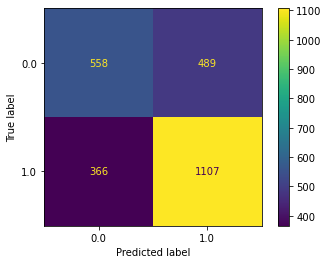

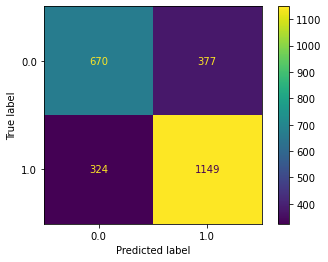

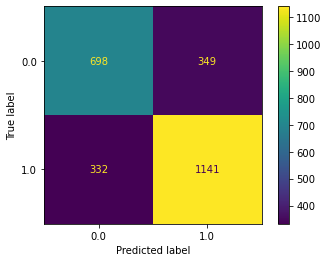

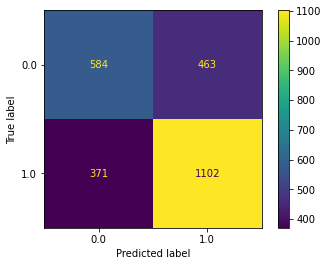

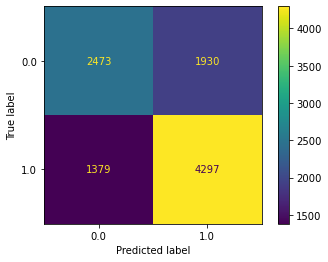

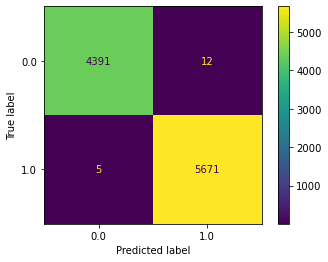

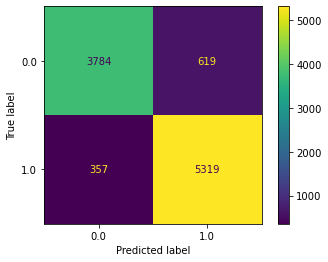

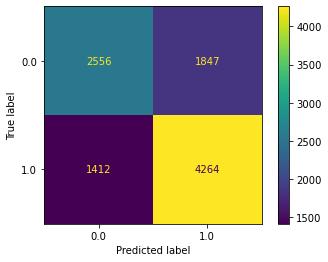

In [35]:
p1=plot_confusion_matrix(dt, X_test, y_test)
p2=plot_confusion_matrix(rf, X_test, y_test)
p3=plot_confusion_matrix(sv, X_test, y_test)
p11=plot_confusion_matrix(LR, X_test, y_test)

p13=plot_confusion_matrix(dt, X_train, y_train)
p14=plot_confusion_matrix(rf, X_train, y_train)
p15=plot_confusion_matrix(sv, X_train, y_train)
p23=plot_confusion_matrix(LR, X_train, y_train)

# Plotting Decision Tree

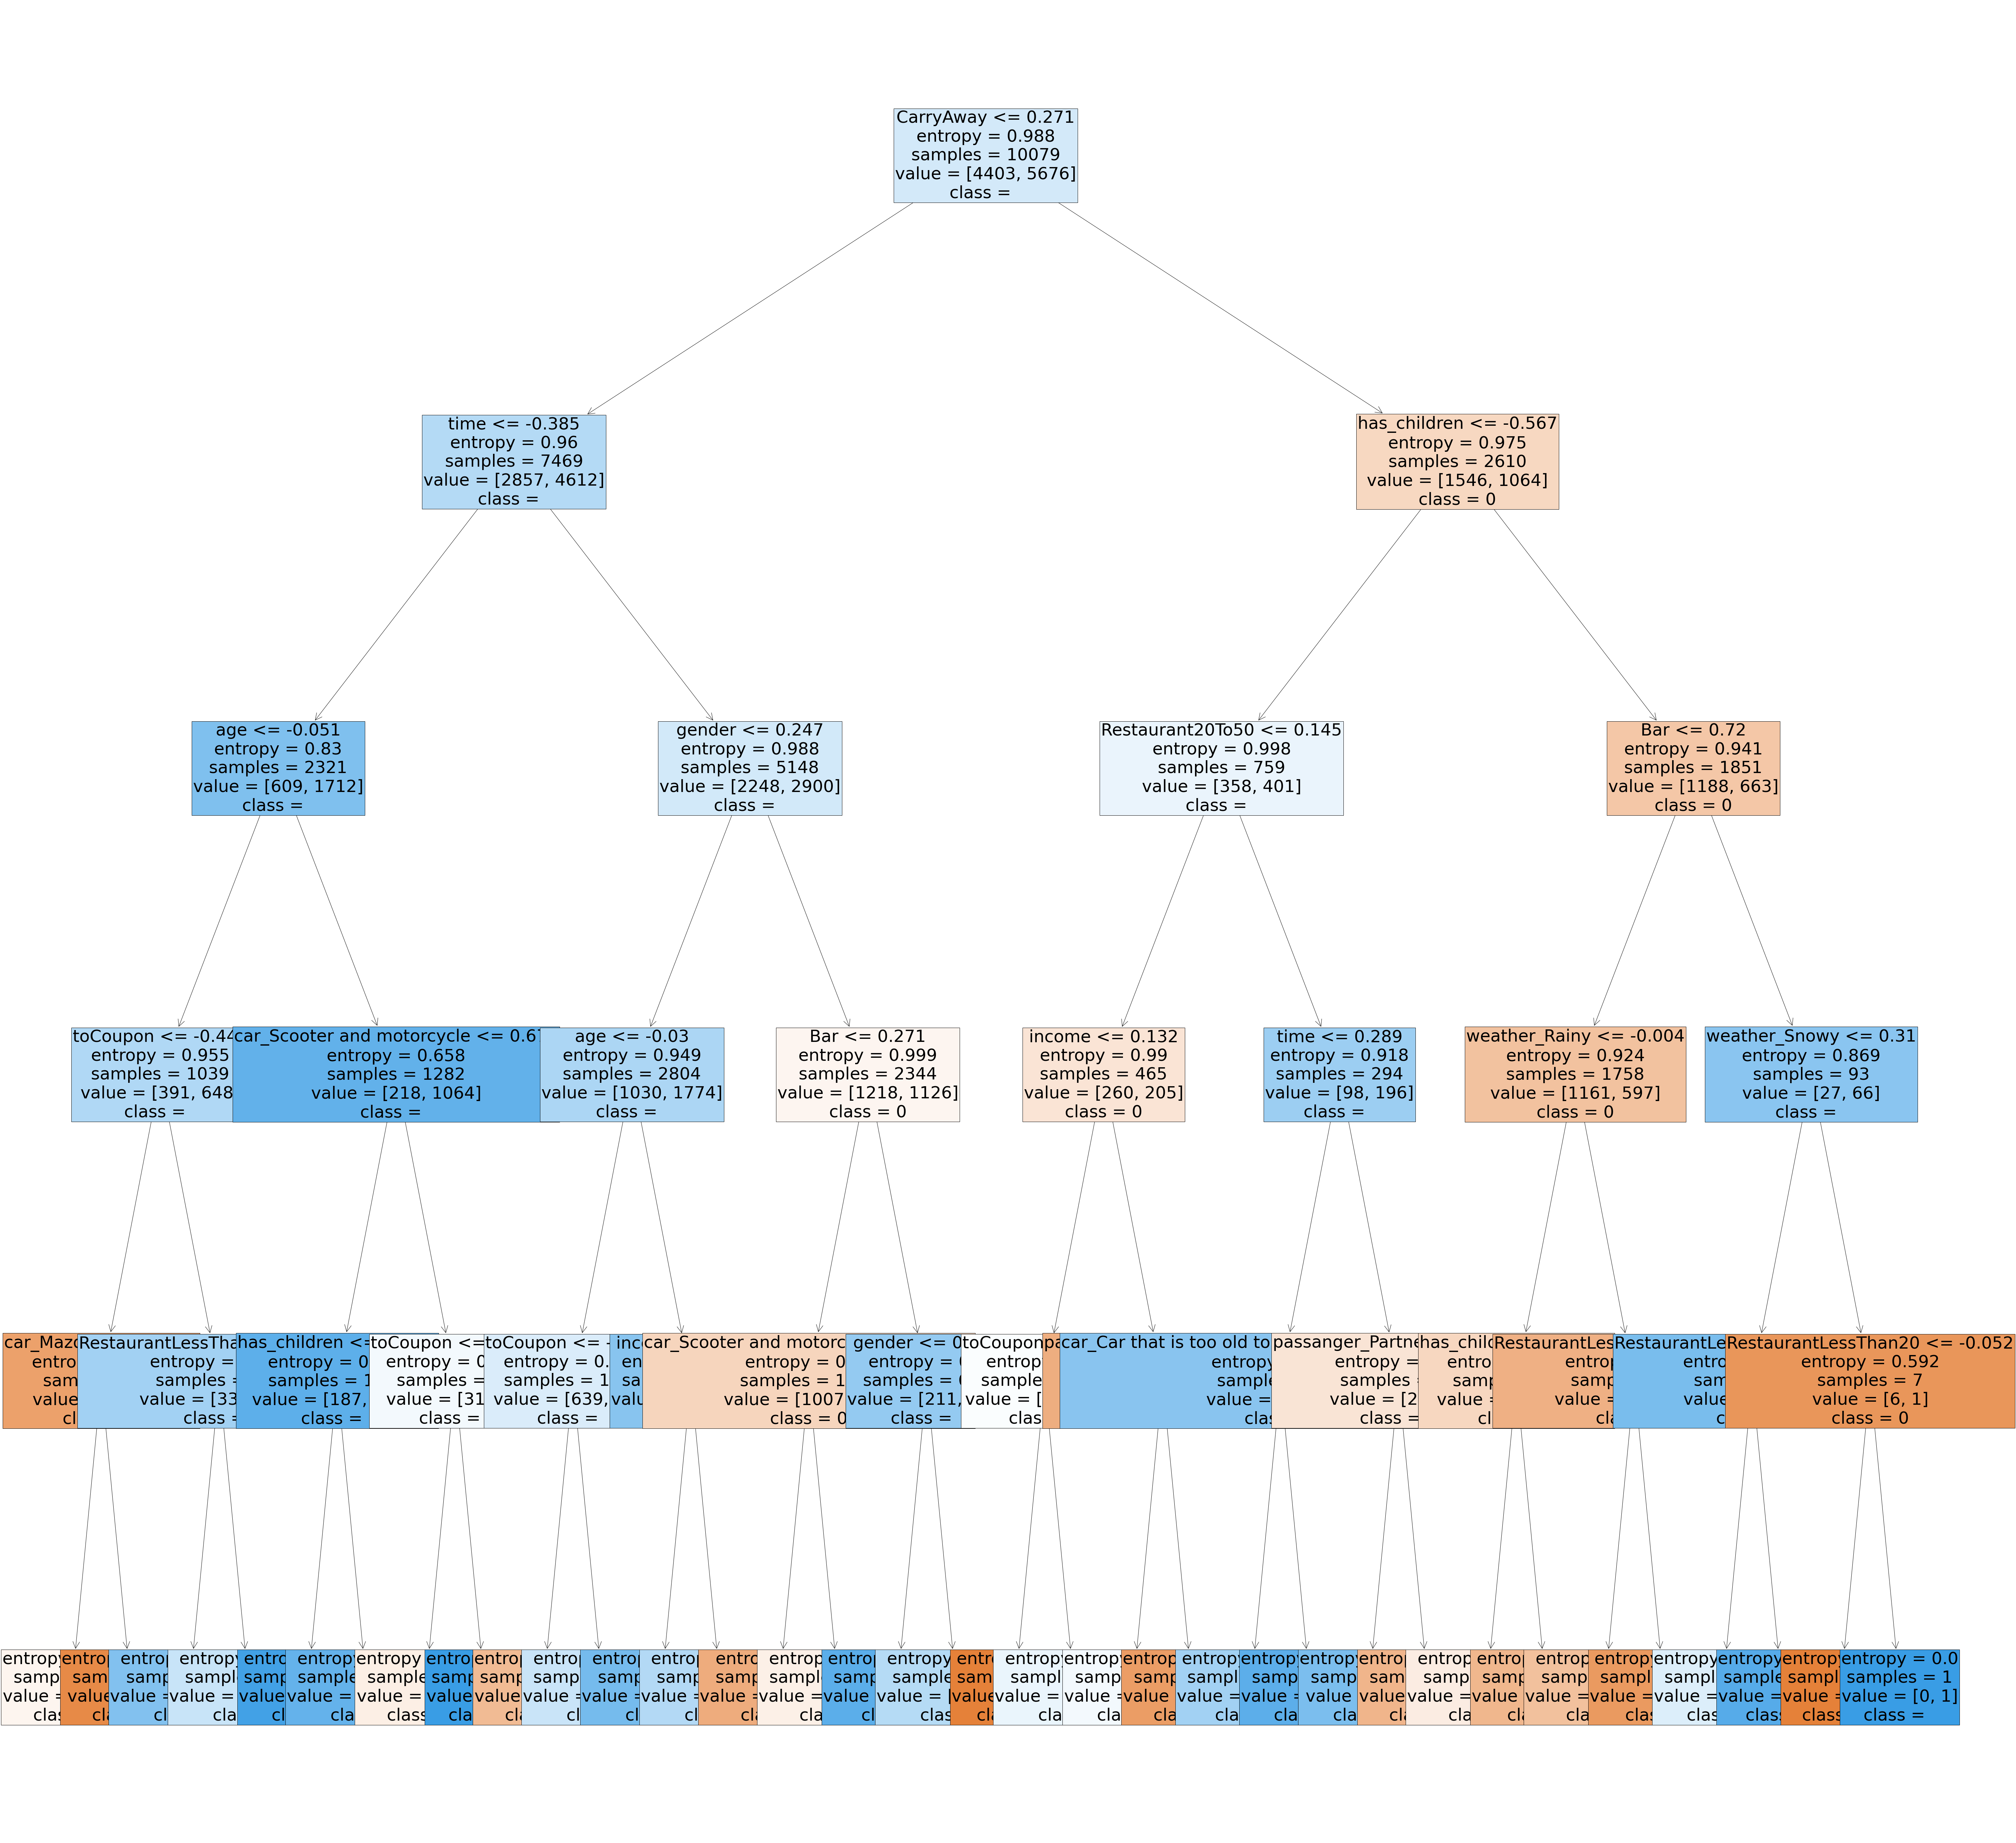

In [36]:
from sklearn import tree
import pydotplus
fig = plt.figure(figsize=(100,100))
fn=np.array(X1.columns)

cn=str(y1)
treee = tree.plot_tree(dt, fontsize=50,feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('dt_individualtree_PCA.png')

# Validating the Training set Accuracy


In [37]:

dt_pred1 = dt.predict(X_train)
rf_pred1 = rf.predict(X_train)
sv_pred1 = sv.predict(X_train)
gnb_pred1 = gnb.predict(X_train)
KNN_pred1= KNN.predict(X_train)
BC_pred1 = BC.predict(X_train)
EC_pred1 = EC.predict(X_train)
ADC_pred1 = ADC.predict(X_train)
GBC_pred1 = GBC.predict(X_train)
LR_pred1 = LR.predict(X_train)
BCR_pred1 = BCR.predict(X_train)


dt_acc1 = accuracy_score(y_train, dt_pred1)
rf_acc1 = accuracy_score(y_train, rf_pred1)
sv_acc1 = accuracy_score(y_train, sv_pred1)
gnb_acc1 = accuracy_score(y_train, gnb_pred1)
KNN_acc1 = accuracy_score(y_train, KNN_pred1)
BC_acc1 = accuracy_score(y_train, BC_pred1)
EC_acc1 = accuracy_score(y_train, EC_pred1)
ADC_acc1 = accuracy_score(y_train, ADC_pred1)
GBC_acc1 = accuracy_score(y_train, GBC_pred1)
LR_acc1 = accuracy_score(y_train, LR_pred1)
BCR_acc1 = accuracy_score(y_train, BCR_pred1)


dt_auc1 = roc_auc_score(y_train, dt_pred1)
rf_auc1 = roc_auc_score(y_train, rf_pred1)
sv_auc1 = roc_auc_score(y_train, sv_pred1)
gnb_auc1 = roc_auc_score(y_train, gnb_pred1)
KNN_auc1 = roc_auc_score(y_train, KNN_pred1)
BC_auc1 = roc_auc_score(y_train, BC_pred1)
EC_auc1 = roc_auc_score(y_train, EC_pred1)
ADC_auc1 = roc_auc_score(y_train, ADC_pred1)
GBC_auc1 = roc_auc_score(y_train, GBC_pred1)
LR_auc1 = roc_auc_score(y_train, LR_pred1)
BCR_auc1 = roc_auc_score(y_train, BCR_pred1)


print('Decision tree acc: %.6f' % dt_acc1)
print('Random forest acc: %.6f' % rf_acc1)
print('SVM acc: %.6f' % sv_acc1)
print('Nabive Baise acc: %.6f' % gnb_acc1)
print('KNN: %.6f' % KNN_acc1)
print('BAGGING: %.6f' % BC_acc1)
print('Extra tree: %.6f' % EC_acc1)
print('ADC Boosting: %.6f' % ADC_acc1)
print('GDC Boosting: %.6f' % GBC_acc1)
print('Logistic: %.6f' % LR_acc1)
print('BAGGING Random Forest: %.6f' % BCR_acc1)

print()
print('Decision tree AUC: %.6f' % dt_auc1)
print('Random forest AUC: %.6f' % rf_auc1)
print('SVM AUC: %.6f' % sv_auc1)
print('gnb AUC: %.6f' % gnb_auc1)
print('KNN AUC: %.6f' % KNN_auc1)
print('Bagging AUC: %.6f' % BC_auc1)
print('Extra tree AUC: %.6f' % EC_auc1)
print('ADC Boosting: %.6f' % ADC_auc1)
print('GDC Boosting: %.6f' % GBC_auc1)
print('Logistic: %.6f' % LR_auc1)
print('BAGGING Random Forest: %.6f' % BCR_auc1)


Decision tree acc: 0.671694
Random forest acc: 0.998313
SVM acc: 0.903165
Nabive Baise acc: 0.671297
KNN: 0.779244
BAGGING: 0.709297
Extra tree: 0.998313
ADC Boosting: 0.708007
GDC Boosting: 0.745709
Logistic: 0.676654
BAGGING Random Forest: 0.990376

Decision tree AUC: 0.659355
Random forest AUC: 0.998197
SVM AUC: 0.898259
gnb AUC: 0.665599
KNN AUC: 0.771654
Bagging AUC: 0.693632
Extra tree AUC: 0.998502
ADC Boosting: 0.697123
GDC Boosting: 0.734112
Logistic: 0.665873
BAGGING Random Forest: 0.989138


In [38]:
print(dt)
print(rf)
print(sv)
print(gnb)
print(BC)
print(EC)
print(ADC)
print(GBC)
print(KNN)
print(LR)
print(BCR)


DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       random_state=RandomState(MT19937) at 0x1584D0EEB40)
RandomForestClassifier(criterion='entropy',
                       random_state=RandomState(MT19937) at 0x1584D0EEB40)
SVC(C=15.0)
GaussianNB()
BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        random_state=RandomState(MT19937) at 0x1584D0EEB40),
                  n_estimators=100, random_state=7)
ExtraTreesClassifier(max_features=3)
AdaBoostClassifier(n_estimators=100, random_state=7)
GradientBoostingClassifier(random_state=7)
KNeighborsClassifier()
LogisticRegression(multi_class='multinomial', solver='newton-cg')
BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        random_state=RandomState(MT19937) at 0x1584D0EEB40),
         

# Voting

In [39]:
from sklearn.ensemble import VotingClassifier

In [40]:
Estimators = []
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                            random_state=rng)
Estimators.append(('Decision_Tree', dt))

rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=rng)
Estimators.append(('Random_Forest', rf))

sv = SVC(kernel='rbf', C=15.0)
Estimators.append(('SVM', sv))


LR=LogisticRegression(multi_class='multinomial', solver='newton-cg')
Estimators.append(('Logistic', LR))




In [41]:
# create the ensemble model
ensemble = VotingClassifier(Estimators)
results = cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.6854516686208505


# Explorative data analysis


In [42]:
from matplotlib import pyplot

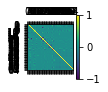

In [43]:
correlations = df.corr(method='pearson')
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(353)
fig = pyplot.figure(figsize =(200,50))
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
names=df.head()
ticks = np.arange(0,65,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [44]:
from pandas.plotting import scatter_matrix

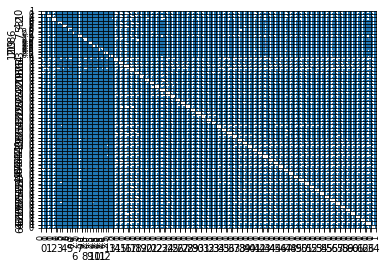

In [45]:
scatter_matrix(df)

pyplot.show()

In [46]:
peek = df.head(20)
print(peek)

     0    1    2    3    4    5    6    7    8    9   ...   55   56   57   58  \
0   0.0  1.0  0.0  3.0  2.0  1.0  2.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1   0.0  1.0  0.0  3.0  2.0  1.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2   0.0  1.0  0.0  3.0  2.0  1.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3   0.0  1.0  0.0  3.0  2.0  1.0  2.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4   0.0  1.0  0.0  3.0  2.0  1.0  2.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
5   0.0  1.0  0.0  3.0  2.0  1.0  3.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
6   0.0  1.0  0.0  3.0  2.0  1.0  2.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
7   0.0  1.0  0.0  3.0  2.0  1.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
8   0.0  1.0  0.0  3.0  2.0  1.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
9   0.0  1.0  0.0  3.0  2.0  1.0  1.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
10  0.0  1.0  0.0  3.0  2.0  1.0  2.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
11  0.0  1.0  0.0  3.0  2.0 

In [47]:
shape = df.shape
print(shape)

(12599, 65)


In [48]:
type = df.dtypes
print(type)

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
60    float64
61    float64
62    float64
63    float64
64    float64
Length: 65, dtype: object


In [49]:
from pandas import set_option

In [50]:
set_option('display.width', 200)
set_option('display.max_columns', 10)
set_option('precision', 3)

description = df1.describe()
print(description)

          gender  has_children  direction_same     income  education  ...  occupation_Sales & Related  occupation_Student  occupation_Transportation & Material Moving  occupation_Unemployed  \
count  12599.000     12599.000       12599.000  12599.000  12599.000  ...                   12599.000           12599.000                                    12599.000              12599.000   
mean       0.487         0.415           0.215      3.733      3.127  ...                       0.086               0.125                                        0.017                  0.147   
std        0.500         0.493           0.411      2.542      1.264  ...                       0.281               0.331                                        0.130                  0.354   
min        0.000         0.000           0.000      0.000      0.000  ...                       0.000               0.000                                        0.000                  0.000   
25%        0.000         0.000     

In [51]:
class_counts = df1.groupby('Y').size()
print(class_counts)


Y
0    5450
1    7149
dtype: int64


In [52]:
correlations = df.corr(method='pearson')
print(correlations)

       0      1      2      3      4   ...     60     61     62     63     64
0   1.000 -0.163 -0.005  0.102 -0.006  ...  0.058  0.092  0.056 -0.139  0.044
1  -0.163  1.000 -0.033  0.091  0.078  ... -0.047 -0.222  0.049 -0.013 -0.045
2  -0.005 -0.033  1.000 -0.025 -0.003  ...  0.003  0.027 -0.004  0.021  0.015
3   0.102  0.091 -0.025  1.000  0.295  ... -0.064 -0.117 -0.002 -0.081 -0.028
4  -0.006  0.078 -0.003  0.295  1.000  ... -0.033 -0.144 -0.066 -0.115 -0.054
..    ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
60  0.058 -0.047  0.003 -0.064 -0.033  ...  1.000 -0.116 -0.041 -0.128 -0.003
61  0.092 -0.222  0.027 -0.117 -0.144  ... -0.116  1.000 -0.050 -0.157  0.032
62  0.056  0.049 -0.004 -0.002 -0.066  ... -0.041 -0.050  1.000 -0.055  0.008
63 -0.139 -0.013  0.021 -0.081 -0.115  ... -0.128 -0.157 -0.055  1.000 -0.017
64  0.044 -0.045  0.015 -0.028 -0.054  ... -0.003  0.032  0.008 -0.017  1.000

[65 rows x 65 columns]


In [53]:
skew = df.skew()
print(skew)

0     0.051
1     0.347
2     1.385
3     0.355
4    -0.103
      ...  
60    2.946
61    2.269
62    7.404
63    1.990
64   -0.272
Length: 65, dtype: float64


In [54]:
skew.to_csv('Skew2_PCA.csv', index=False)

In [55]:
correlations.to_csv('correlations_PCA.csv', index=False)

In [56]:
description.to_csv('description_PCA.csv', index=False)

# Random Forest Tree

In [57]:
from sklearn.tree import export_graphviz

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

<Figure size 14400x11520 with 0 Axes>

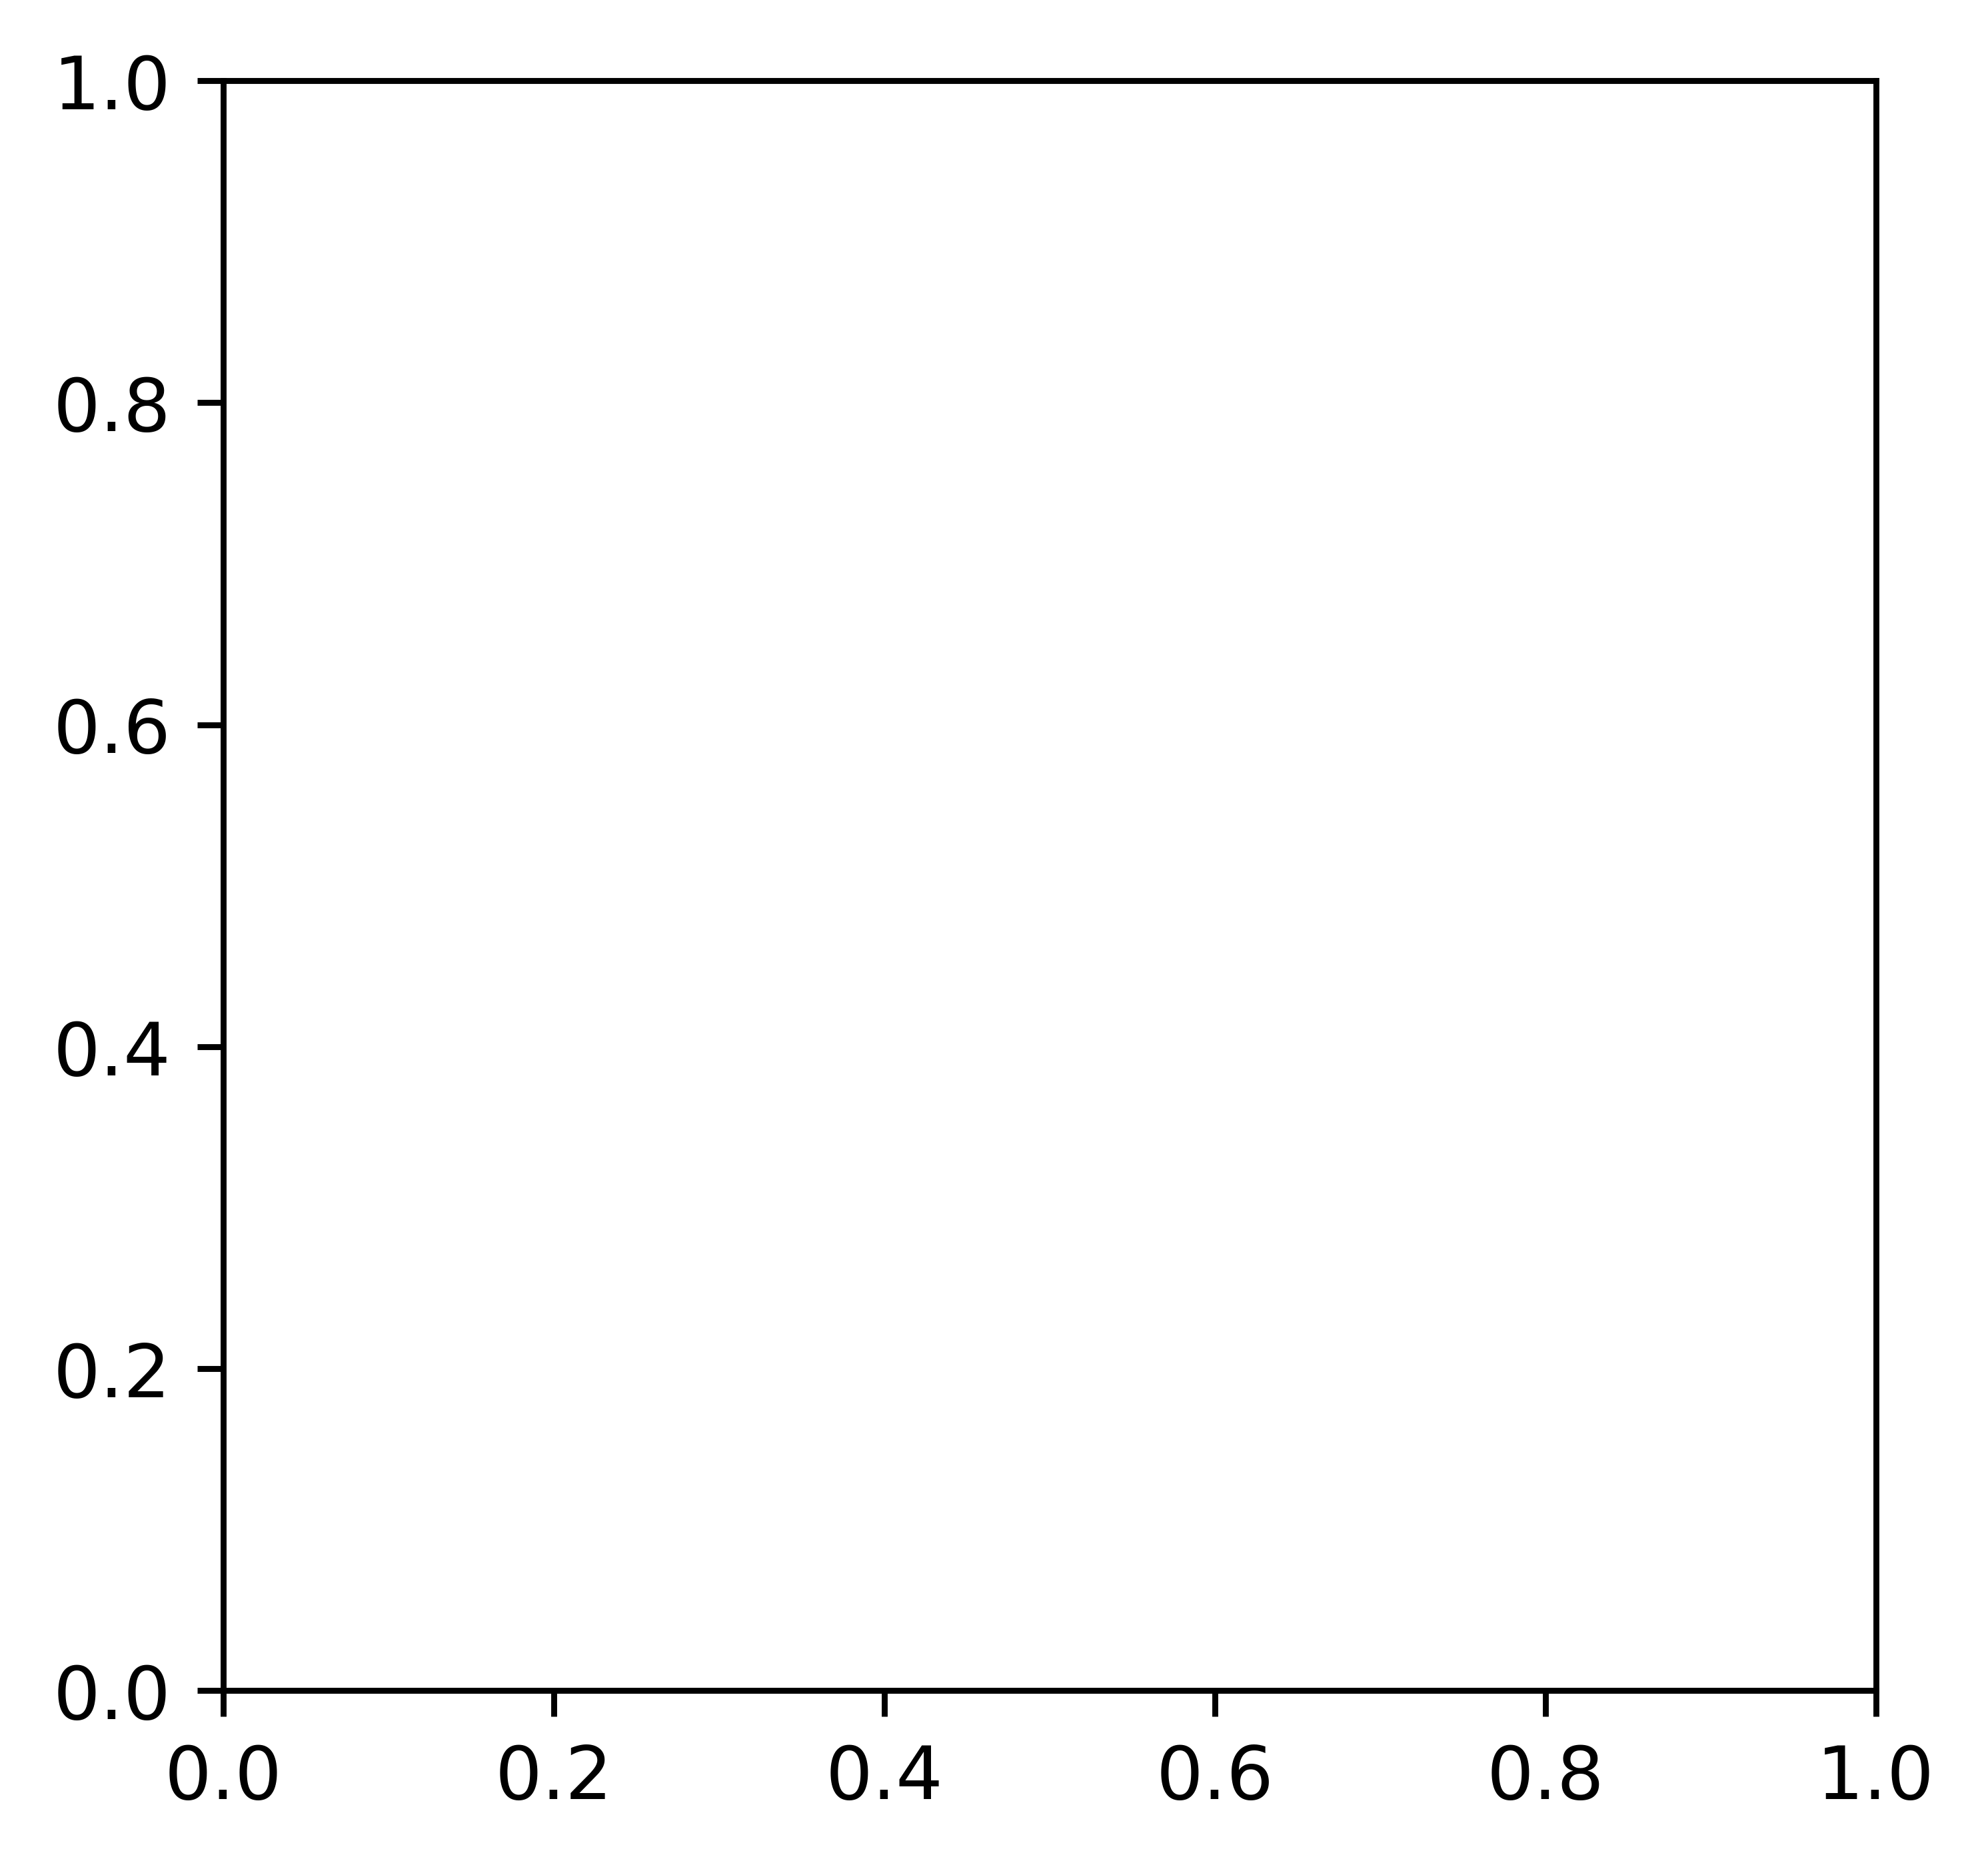

In [58]:
from sklearn import tree
import pydotplus
fig = plt.figure(figsize=(200,160))
fn=np.array(X1.columns)
cn=str(y1)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree_PCA.png')